In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils

display = utils.notebook_init()  # checks

from IPython. display import Image, clear_output # to display images

In [ ]:
!pip install roboflow
import os
from roboflow import Roboflow

rf = Roboflow(api_key="S6yIqitYPtQh1aWo1oq7", model_format="yolov5", notebook="ultralytics")

os.environ["DATASET_DIRECTORY"] = "/content/datasets"

project = rf.workspace("unitylogo1").project("unity-logo-1")
version = project.version(1)
dataset = version.download("yolov5")


In [ ]:
!python yolov5/train.py --img 640 --batch 16 --epochs 20 --data /content/datasets/Unity-Logo-1-1/data.yaml --weights yolov5s.pt


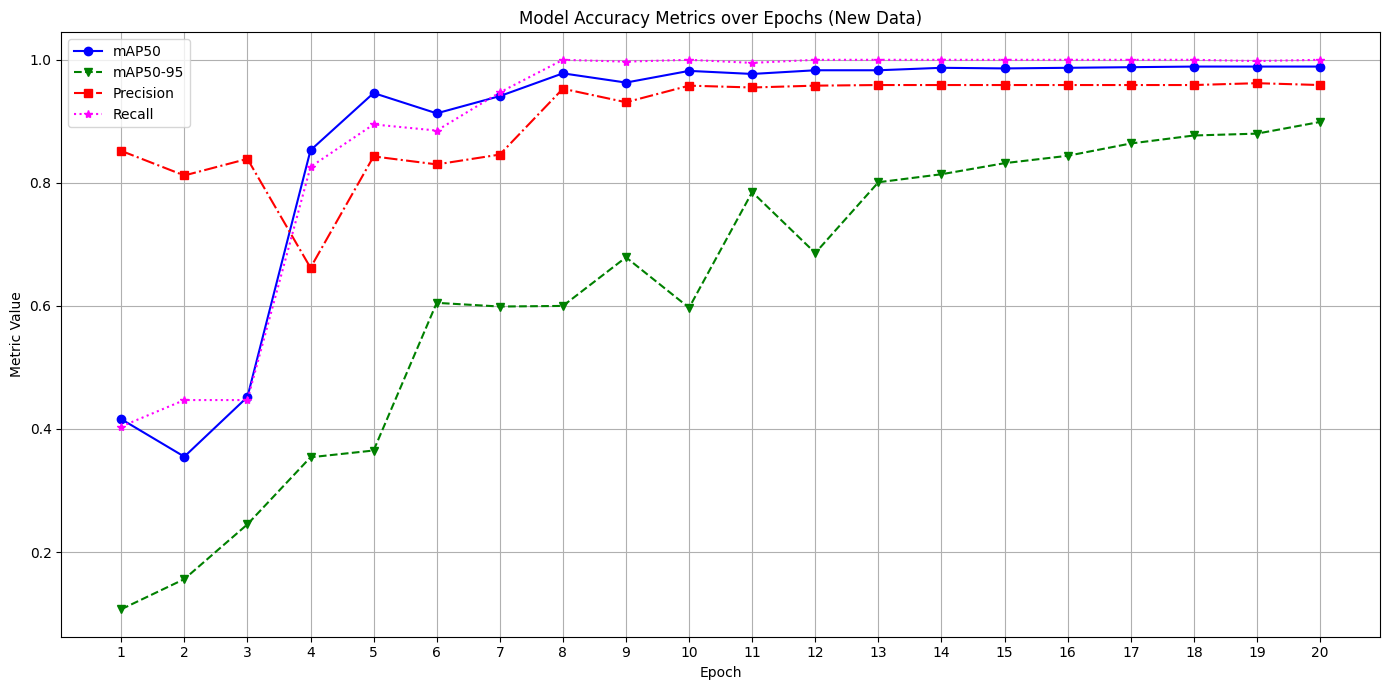

In [ ]:
import matplotlib.pyplot as plt

# Redefining the data with the new results
epochs = list(range(1, 21))
mAP50_new = [
    0.416, 0.355, 0.452, 0.853, 0.946, 0.913, 0.941, 0.978, 0.963,
    0.982, 0.977, 0.983, 0.983, 0.987, 0.986, 0.987, 0.988, 0.989,
    0.989, 0.989
]
mAP50_95_new = [
    0.107, 0.156, 0.245, 0.354, 0.365, 0.605, 0.599, 0.6, 0.679,
    0.597, 0.785, 0.686, 0.801, 0.814, 0.832, 0.844, 0.864, 0.877,
    0.88, 0.899
]
precision_new = [
    0.852, 0.812, 0.839, 0.662, 0.843, 0.83, 0.846, 0.953, 0.931,
    0.958, 0.955, 0.958, 0.959, 0.959, 0.959, 0.959, 0.959, 0.959,
    0.962, 0.959
]
recall_new = [
    0.404, 0.447, 0.447, 0.826, 0.895, 0.885, 0.947, 1, 0.997,
    1, 0.995, 1, 1, 1, 1, 1, 1, 1, 0.998, 1
]

# Plotting the graph of mAP50, mAP50-95, Precision, and Recall over epochs for the new dataset
plt.figure(figsize=(14, 7))
plt.plot(epochs, mAP50_new, marker='o', linestyle='-', color='blue', label='mAP50')
plt.plot(epochs, mAP50_95_new, marker='v', linestyle='--', color='green', label='mAP50-95')
plt.plot(epochs, precision_new, marker='s', linestyle='-.', color='red', label='Precision')
plt.plot(epochs, recall_new, marker='*', linestyle=':', color='magenta', label='Recall')

plt.title('Model Accuracy Metrics over Epochs (New Data)')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!python yolov5/detect.py --weights content/yolov5s.pt --img 416 --conf 0.2 --source /content/datasets/colored-marker-1-1//test/images --save-txt


detect: weights=['content/yolov5s.pt'], source=/content/datasets/colored-marker-1-1//test/images, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 137MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/100 /content/datasets/colored-marker-1-1/test/images/1198454303204210_png.rf.65cf7812cf7bec13ee9752fd00ebad4a.jpg: 416x416 3 persons, 7.4ms
image 2/100 /content/datasets/colored-marker-1-1/test/images/1198454435704210_png.rf.762e92e7e60c7f02c9de18d

Precision-Recall Curve

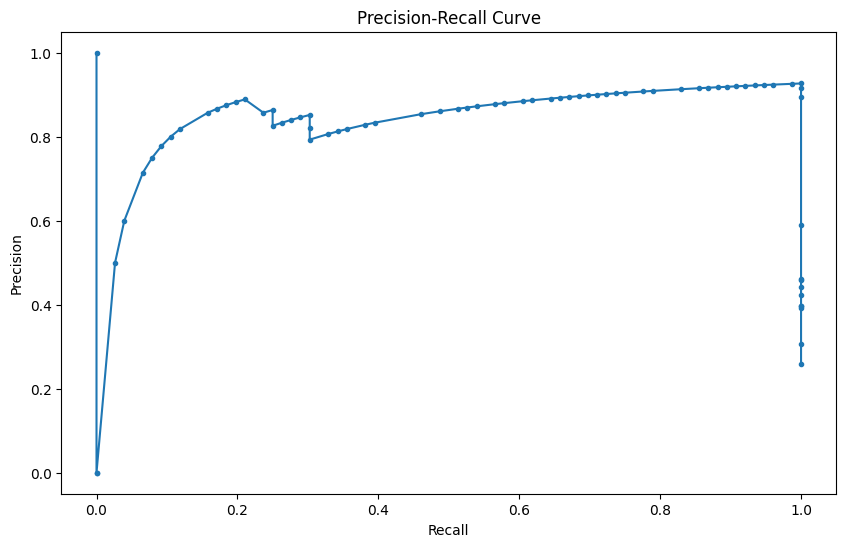

In [ ]:
import glob
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Load ground truth and predicted labels
gt_dir = 'datasets/colored-marker-1-1/test/labels/'
pred_dir = 'yolov5/runs/detect/exp2/labels/'

gt_files = glob.glob(os.path.join(gt_dir, '*.txt'))

# Initialize variables to calculate TP, FP, FN for PR curve and confusion matrix
true_labels = []
score_values = []

def load_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [line.strip().split() for line in f.readlines()]
        return [(int(label[0]), float(label[1]), [float(x) for x in label[2:]]) for label in labels]


def calculate_iou(box1, box2):
    # Convert bounding boxes from (center x, center y, width) to (x1, y1, x2, y2)
    x1_min = box1[0] - box1[2] / 2
    y1_min = box1[1] - box1[2] / 2
    x1_max = box1[0] + box1[2] / 2
    y1_max = box1[1] + box1[2] / 2

    x2_min = box2[0] - box2[2] / 2
    y2_min = box2[1] - box2[2] / 2
    x2_max = box2[0] + box2[2] / 2
    y2_max = box2[1] + box2[2] / 2


    # Calculate the intersection area
    inter_area = max(0, min(x1_max, x2_max) - max(x1_min, x2_min)) * max(0, min(y1_max, y2_max) - max(y1_min, y2_min))
    # Calculate the union area
    union_area = (x1_max - x1_min) * (y1_max - y1_min) + (x2_max - x2_min) * (y2_max - y2_min) - inter_area

    return inter_area / union_area if union_area else 0

for gt_file in gt_files:
    base = os.path.basename(gt_file)
    pred_file = os.path.join(pred_dir, base)

    gt_labels = load_labels(gt_file)
    pred_labels = load_labels(pred_file) if os.path.exists(pred_file) else []

    for pred_label in pred_labels:
        pred_box = pred_label[2]  # This should be a list of bounding box coordinates
        score = pred_label[1]

        matched = False
        for gt_label in gt_labels:
            gt_box = gt_label[2]  # This should also be a list of bounding box coordinates

            if calculate_iou(gt_box, pred_box) >= 0.5:
                true_labels.append(1)  # True positive
                matched = True
                break

        if not matched:
            true_labels.append(0)  # False positive

        score_values.append(score)



# Calculate precision and recall for PR curve
precision, recall, thresholds = precision_recall_curve(true_labels, score_values)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [ ]:
# Initialize variables for TP, FP, FN
tp, fp, fn = 0, 0, 0

for gt_file in gt_files:
    base = os.path.basename(gt_file)
    pred_file = os.path.join(pred_dir, base)

    gt_labels = load_labels(gt_file)
    pred_labels = load_labels(pred_file) if os.path.exists(pred_file) else []

    matched_gt = set()  # Track which ground truth labels are matched

    for pred_label in pred_labels:
        pred_box = pred_label[2]  # This should be a list of bounding box coordinates
        score = pred_label[1]

        matched = False
        for gt_label in gt_labels:
            gt_box = gt_label[2]  # This should also be a list of bounding box coordinates

            if calculate_iou(gt_box, pred_box) >= 0.5:
                tp += 1  # True positive
                # Convert bounding box coordinates in gt_label to tuple before adding
                matched_gt.add((gt_label[0], gt_label[1], tuple(gt_label[2])))
                matched = True
                break

        if not matched:
            fp += 1  # False positive

    # Calculate false negatives (missed ground truth)
    fn += len(gt_labels) - len(matched_gt)  # Subtract matched ground truths from total

# Calculate precision, recall, and F1 score
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")


Precision: 0.2585034013605442, Recall: 0.39790575916230364, F1 Score: 0.3134020618556701


IOU

In [ ]:
# Initialize variables for TP, FP, FN
tp, fp, fn = 0, 0, 0

for gt_file in gt_files:
    base = os.path.basename(gt_file)
    pred_file = os.path.join(pred_dir, base)

    gt_labels = load_labels(gt_file)
    pred_labels = load_labels(pred_file) if os.path.exists(pred_file) else []

    matched_gt = set()  # Track which ground truth labels are matched

    for pred_label in pred_labels:
        pred_box = pred_label[2]  # This should be a list of bounding box coordinates
        score = pred_label[1]

        matched = False
        for gt_label in gt_labels:
            gt_box = gt_label[2]  # This should also be a list of bounding box coordinates

            if calculate_iou(gt_box, pred_box) >= 0.5:
                tp += 1  # True positive
                # Convert bounding box coordinates in gt_label to tuple before adding
                matched_gt.add((gt_label[0], gt_label[1], tuple(gt_label[2])))
                matched = True
                break

        if not matched:
            fp += 1  # False positive

    # Calculate false negatives (missed ground truth)
    fn += len(gt_labels) - len(matched_gt)  # Subtract matched ground truths from total

# Calculate precision, recall, and F1 score
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")


Precision: 0.2585034013605442, Recall: 0.39790575916230364, F1 Score: 0.3134020618556701


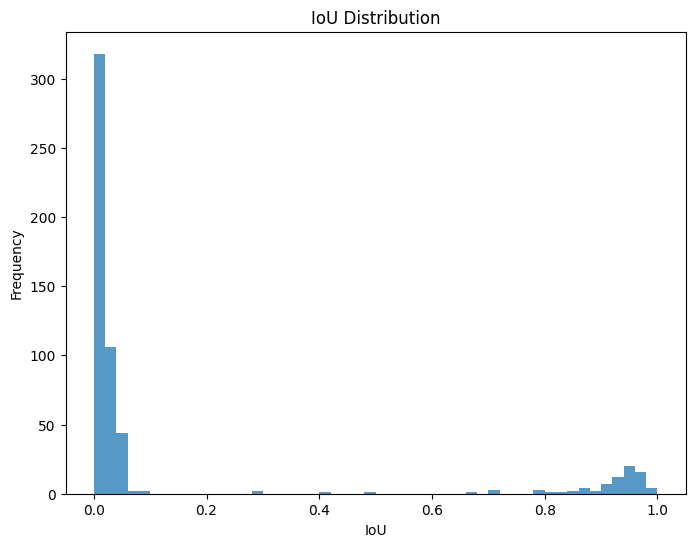

In [ ]:
# Calculate IoU values
ious = []
for gt_file in gt_files:
    base = os.path.basename(gt_file)
    pred_file = os.path.join(pred_dir, base)

    gt_labels = load_labels(gt_file)
    pred_labels = load_labels(pred_file) if os.path.exists(pred_file) else []

    for pred_label in pred_labels:
        pred_box = pred_label[2]  # This should be a list of bounding box coordinates

        for gt_label in gt_labels:
            gt_box = gt_label[2]  # This should also be a list of bounding box coordinates
            iou = calculate_iou(gt_box, pred_box)
            ious.append(iou)

# Plot IoU Distribution
plt.figure(figsize=(8, 6))
plt.hist(ious, bins=50, range=(0, 1), alpha=0.75)
plt.title('IoU Distribution')
plt.xlabel('IoU')
plt.ylabel('Frequency')
plt.show()